In [39]:
#kompatybilnosc python 2/3
from __future__ import print_function

import keras

#MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
#dense (w pełni połączona warstwa), dropout (technika wspomagająca generalizację), flatten (do przekształcania 
#zmiany wymiarów macierzy)
from keras.layers import Dense, Dropout, Flatten
#warstwa konwolucyjna, dla analizy danych typu obrazowego, oraz warstwa poolingu, która wybiera / filtruje
#najważniejsze obszary wydobyte przez wartswę konwolucyjną oraz zmniejsza rozmiar macierzy wyjściowej z warstwy
#konwolucyjnej
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [40]:
#rozmiar batchu
batch_size = 128
#rozpoznajemy 10 cyfr
num_classes = 10
#12 epok
epochs = 12

# wymiary pliku z obrazkiem
#28x28 pixel. 
img_rows, img_cols = 28, 28

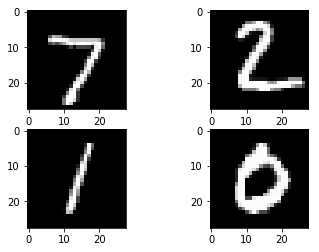

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
# dobrze 'oklepane' zestawy danych w kerasie mają własne moduły, i gotowe funkcje generujące dane
# jednakże, z jakiegoś powodu, load_data nie zwraca osobnego zbioru walidacyjnego
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_cp = x_test
#sprawdźmy jak wyglądają dane
plt.subplot(221)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test[3], cmap=plt.get_cmap('gray'))
plt.show()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# zamiana labelek na wektory one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [42]:
#budujemy model
#model jest sekwencją warstw
model = Sequential()
#warstwa konwolucyjna z aktywacja ReLU
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#kolejne warstwy konwolucyjne, z coraz większą ilością filtrów
model.add(Conv2D(64, (3, 3), activation='relu'))
#max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#dodajemy dropout, aby sieć była bardziej odporna na przetrenowani
model.add(Dropout(0.25))
#z macierzy którą dostajemy na wyjściu robimy wektor - spłaszczenie
model.add(Flatten())
#warstwa w pełni połączona
model.add(Dense(128, activation='relu'))
#jeszcze jeden dropout
model.add(Dropout(0.5))
#aktywacja softmax zamienia wyjściowe liczby na znormalizowane prawdopodobieństwa odpowiadające klasom
model.add(Dense(num_classes, activation='softmax'))
#kompilacja modelu, ustalenie funkcji kosztu oraz rodzaju algorytmu optymalizacji do uczenia sieci,
#oraz sposobu oceniania dokładności rozwiązania - metryki
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [43]:
#trenowanie sieci
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2) #zbiór walidacyjny stanowi 10% zbioru trenującego, nie jest używany w trenowaniu
 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 160s - loss: 0.3778 - acc: 0.8845 - val_loss: 0.0944 - val_acc: 0.9723
Epoch 2/12
48000/48000 [==============================] - 161s - loss: 0.1221 - acc: 0.9636 - val_loss: 0.0671 - val_acc: 0.9806
Epoch 3/12
48000/48000 [==============================] - 159s - loss: 0.0907 - acc: 0.9730 - val_loss: 0.0552 - val_acc: 0.9827
Epoch 4/12
48000/48000 [==============================] - 157s - loss: 0.0792 - acc: 0.9766 - val_loss: 0.0516 - val_acc: 0.9843
Epoch 5/12
26752/48000 [===============>..............] - ETA: 67s - loss: 0.0680 - acc: 0.9802

KeyboardInterrupt: 

Train on 79 samples, validate on 20 samples
Epoch 1/1
79/79 [==============================] - 0s - loss: 1.7918 - acc: 0.5570 - val_loss: 1.6666 - val_acc: 0.5500
Test loss: 1.88986833229
Test accuracy: 0.4441


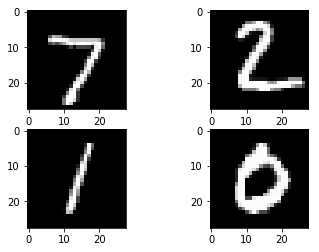

[[ 0.12045632  0.05623256  0.10054084  0.0807222   0.0817871   0.05771167
   0.07259885  0.16337664  0.06302012  0.20355365]
 [ 0.14222389  0.1361029   0.13932233  0.13967007  0.09781228  0.04894775
   0.1195135   0.04465311  0.06499191  0.06676226]
 [ 0.06523419  0.23030087  0.09033611  0.07713163  0.08372798  0.07651608
   0.09415308  0.09948779  0.08738743  0.09572485]
 [ 0.36579293  0.04096952  0.08487795  0.05186976  0.08982685  0.03116685
   0.11849676  0.06880574  0.03905576  0.10913777]]
[9 0 1 0]


In [38]:
#sprawdzimy kilka przykładów
plt.subplot(221)
plt.imshow(x_test_cp[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_test_cp[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test_cp[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test_cp[3], cmap=plt.get_cmap('gray'))
plt.show()

prediction = model.predict(x_test[0:4])
print(prediction)
import numpy as np
print(np.argmax(prediction, 1))

In [ ]:
#zapisywanie modelu
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#zapisywanie wytrenowanych wag
model.save_weights("model.h5")
print("Saved model to disk")